# 🧠 Análise Exploratória de Dados

Este notebook realiza uma **análise exploratória detalhada** dos três conjuntos de dados disponíveis (`Data1.csv`, `Data2.csv`, `Data3.csv`).

O objetivo é compreender o comportamento das variáveis de entrada (`PwmD`, `PwmE`) e das variáveis de saída (`Wd`, `We`), identificando padrões, correlações e possíveis problemas como outliers ou desbalanceamento.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway

sns.set(style="whitegrid", context="notebook")

PREDICTORS = ["PwmD", "PwmE"]
TARGET = ["Wd", "We"]
Datasets = []

for i in range(3):
    Dataset = pd.read_csv(f"../Dados/Data{i + 1}.csv")
    Dataset.index = (np.arange(0, len(Dataset), 1).astype(float) * 0.07).round(5)
    Datasets.append(Dataset)

print(f"Foram carregados {len(Datasets)} datasets.")

Foram carregados 3 datasets.


## 🔍 1. Estrutura dos Dados
Primeiro, verificamos informações gerais sobre o formato de cada dataset, valores ausentes e estatísticas básicas das variáveis.

In [11]:
for i, data in enumerate(Datasets):
    print(f"\n=== Dataset {i+1} ===")
    display(data.info())
    display(data.describe().T)
    print("Valores nulos:")
    print(data.isnull().sum())


=== Dataset 1 ===
<class 'pandas.core.frame.DataFrame'>
Index: 1421 entries, 0.0 to 99.4
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1421 non-null   float64
 1   Y       1421 non-null   float64
 2   Theta   1421 non-null   float64
 3   Wd      1421 non-null   float64
 4   We      1421 non-null   float64
 5   WdRef   1421 non-null   float64
 6   WeRef   1421 non-null   float64
 7   PwmD    1421 non-null   float64
 8   PwmE    1421 non-null   float64
dtypes: float64(9)
memory usage: 111.0 KB


None

,count,mean,std,min,25%,50%,75%,max
X,1421.0,0.519887,0.304259,0.00,0.22,0.55,0.78,0.99
Y,1421.0,0.287994,0.277713,-0.14,0.02,0.29,0.52,0.72
Theta,1421.0,0.205904,0.572861,-0.92,-0.15,0.14,0.58,1.38
Wd,1421.0,-0.207206,1.929010,-4.93,-1.81,-0.11,0.00,6.19
We,1421.0,-0.174687,1.892039,-4.04,-2.06,0.00,0.00,3.35
WdRef,1421.0,-0.228656,1.996840,-3.09,-2.10,-0.55,0.55,3.02
WeRef,1421.0,-0.189796,1.952956,-3.09,-2.07,-0.55,0.61,3.02
PwmD,1421.0,-34.043821,73.345096,-133.35,-91.69,-69.02,25.19,109.47
PwmE,1421.0,-37.099254,92.896049,-155.22,-111.66,-77.53,49.87,132.96


Valores nulos:
X        0
Y        0
Theta    0
Wd       0
We       0
WdRef    0
WeRef    0
PwmD     0
PwmE     0
dtype: int64

=== Dataset 2 ===
<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0.0 to 88.97
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1272 non-null   float64
 1   Y       1272 non-null   float64
 2   Theta   1272 non-null   float64
 3   Wd      1272 non-null   float64
 4   We      1272 non-null   float64
 5   WdRef   1272 non-null   float64
 6   WeRef   1272 non-null   float64
 7   PwmD    1272 non-null   float64
 8   PwmE    1272 non-null   float64
dtypes: float64(9)
memory usage: 99.4 KB


None

,count,mean,std,min,25%,50%,75%,max
X,1272.0,0.526030,0.310276,0.00,0.2600,0.520,0.8600,0.98
Y,1272.0,0.316557,0.273383,-0.05,0.0400,0.275,0.5825,0.71
Theta,1272.0,0.244670,0.571573,-0.82,-0.0100,0.060,0.6425,1.48
Wd,1272.0,-0.234017,2.058007,-3.71,-2.0900,0.000,0.0300,3.51
We,1272.0,-0.198443,2.051797,-3.68,-2.2600,0.000,0.0000,3.35
WdRef,1272.0,-0.253019,2.137377,-3.09,-2.3100,-0.560,2.5600,3.02
WeRef,1272.0,-0.216336,2.127857,-3.09,-2.1525,-0.550,2.7000,3.02
PwmD,1272.0,-24.071305,89.303684,-136.44,-102.0500,-76.670,94.0000,130.20
PwmE,1272.0,-36.436258,93.941790,-148.66,-112.6850,-75.120,55.5650,129.68


Valores nulos:
X        0
Y        0
Theta    0
Wd       0
We       0
WdRef    0
WeRef    0
PwmD     0
PwmE     0
dtype: int64

=== Dataset 3 ===
<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0.0 to 69.23
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       990 non-null    float64
 1   Y       990 non-null    float64
 2   Theta   990 non-null    float64
 3   Wd      990 non-null    float64
 4   We      990 non-null    float64
 5   WdRef   990 non-null    float64
 6   WeRef   990 non-null    float64
 7   PwmD    990 non-null    float64
 8   PwmE    990 non-null    float64
dtypes: float64(9)
memory usage: 77.3 KB


None

,count,mean,std,min,25%,50%,75%,max
X,990.0,0.555960,0.320441,0.00,0.2600,0.590,0.8800,0.97
Y,990.0,0.337970,0.282705,-0.01,0.0200,0.310,0.6875,0.70
Theta,990.0,0.053990,0.533994,-0.94,-0.2675,0.000,0.4400,1.57
Wd,990.0,-0.240535,2.274985,-4.04,-2.1500,-0.095,2.1200,3.93
We,990.0,-0.197212,2.303181,-4.21,-2.2300,0.000,2.3325,4.04
WdRef,990.0,-0.266535,2.323441,-3.30,-2.1900,-1.010,2.3875,3.28
WeRef,990.0,-0.233434,2.311379,-3.30,-2.1300,-1.000,2.4000,3.28
PwmD,990.0,-15.869071,89.199398,-131.00,-98.8100,-73.630,90.1325,131.51
PwmE,990.0,-20.926182,97.767625,-148.65,-106.9075,-78.990,103.0675,163.51


Valores nulos:
X        0
Y        0
Theta    0
Wd       0
We       0
WdRef    0
WeRef    0
PwmD     0
PwmE     0
dtype: int64


🧩 **Interpretação:**
- A função `info()` revela o número de linhas, tipos de dados e existência de valores nulos.
- O `describe()` mostra estatísticas como média, desvio padrão, mínimo e máximo.
- É importante confirmar que todas as colunas são numéricas e que não há valores ausentes.

## 📊 2. Distribuição das Variáveis
Aqui verificamos a forma das distribuições das variáveis preditoras e alvo. Distribuições simétricas indicam comportamento estável; distribuições assimétricas podem revelar saturação ou zonas mortas no sistema.

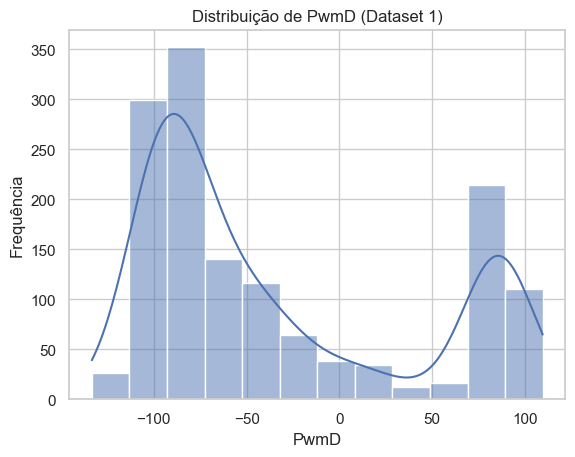

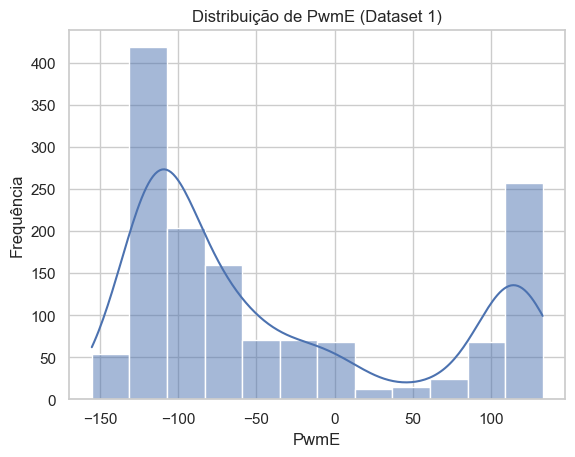

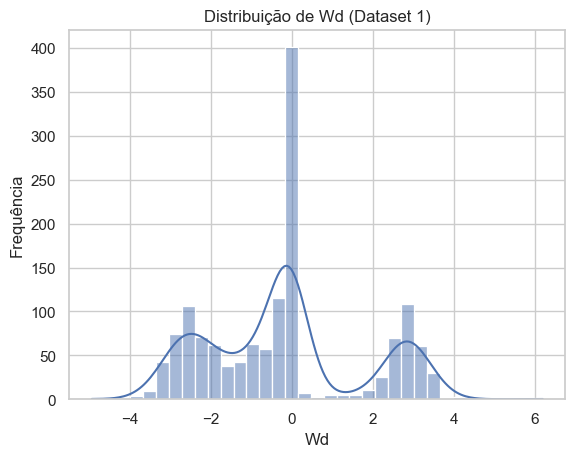

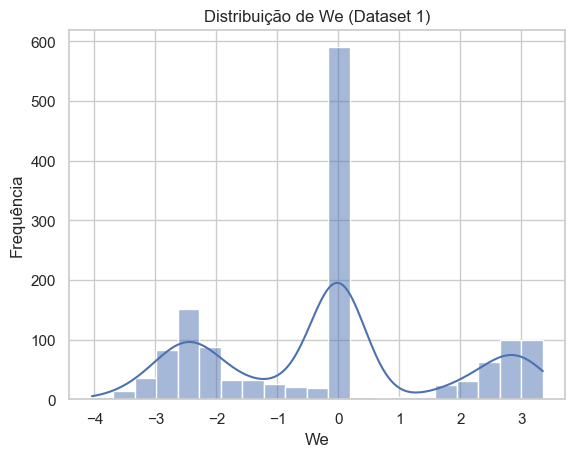

In [12]:
for col in PREDICTORS + TARGET:
    sns.histplot(Datasets[0][col], kde=True)
    plt.title(f"Distribuição de {col} (Dataset 1)")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()

📈 **Interpretação:**
- O formato das curvas indica se os dados são normalmente distribuídos ou não.
- Valores muito concentrados em uma faixa indicam possível limitação do sensor ou saturação de controle.
- A presença de várias modas (picos) pode indicar regimes operacionais distintos.

## 🎯 3. Boxplots — Detecção de Outliers
Os boxplots ajudam a visualizar valores fora da faixa esperada (outliers), que podem distorcer médias e correlações.

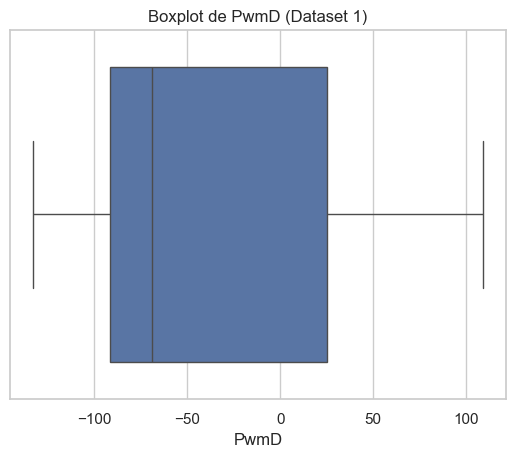

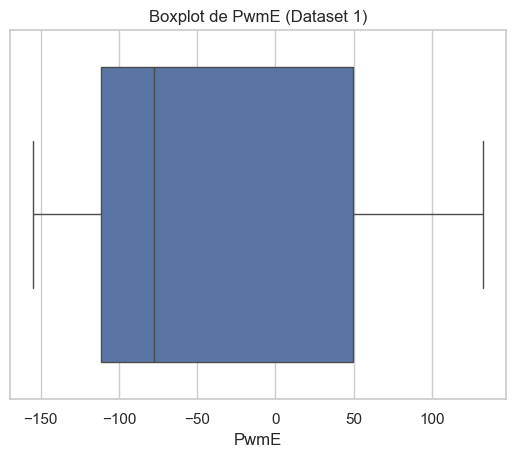

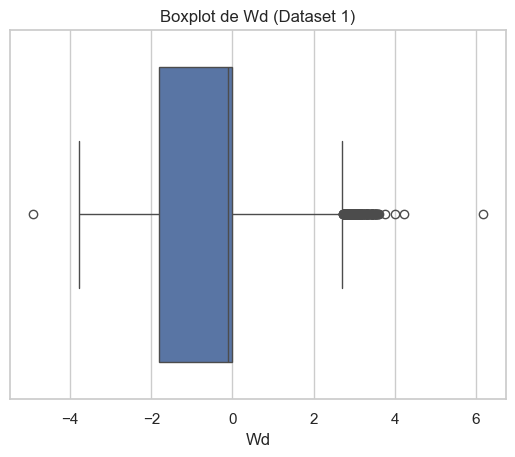

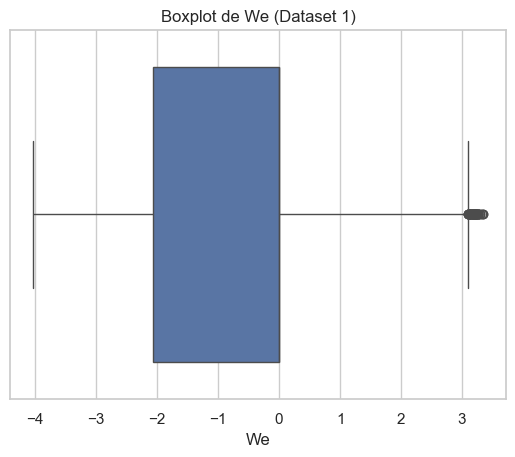

In [13]:
for col in PREDICTORS + TARGET:
    sns.boxplot(x=Datasets[0][col])
    plt.title(f"Boxplot de {col} (Dataset 1)")
    plt.show()

📊 **Interpretação:**
- Pontos fora do intervalo interquartil (caixas) indicam **outliers potenciais**.
- Se forem recorrentes, podem ser dados reais de operação extrema; se raros, podem ser ruído ou erro de medição.

## 🔗 4. Relações entre Variáveis (Pairplot)
O gráfico de dispersão mostra correlações e relações não lineares entre as variáveis de entrada e saída.

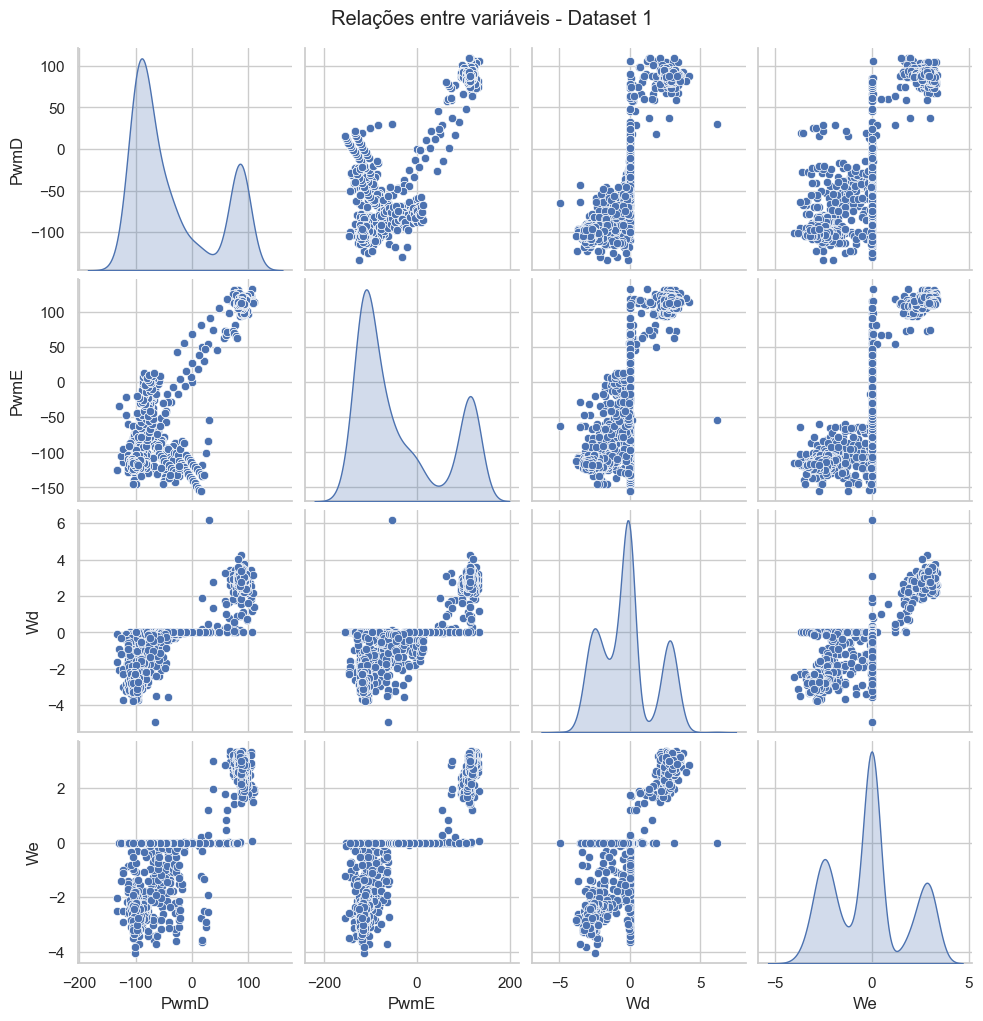

In [14]:
sns.pairplot(Datasets[0][PREDICTORS + TARGET], diag_kind='kde')
plt.suptitle("Relações entre variáveis - Dataset 1", y=1.02)
plt.show()

🧠 **Interpretação:**
- Relações lineares aparecem como nuvens inclinadas.
- Relações não lineares podem ser curvas ou padrões em forma de arco.
- A diagonal mostra a densidade individual de cada variável.

## 🧮 5. Matriz de Correlação
A matriz de correlação ajuda a identificar variáveis fortemente relacionadas entre si.

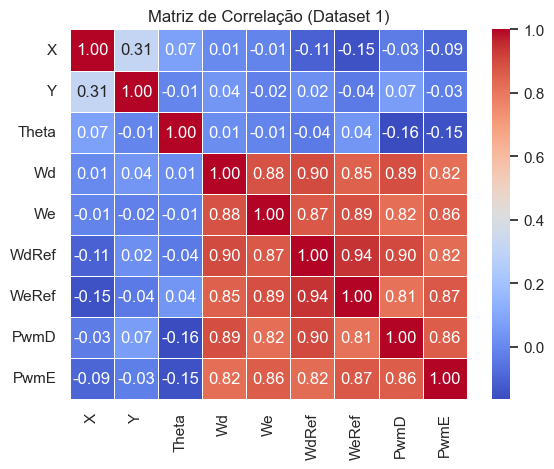

In [15]:
corr = Datasets[0].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Matriz de Correlação (Dataset 1)")
plt.show()

📉 **Interpretação:**
- Valores próximos de 1 ou -1 indicam forte correlação.
- Correlações altas entre `PwmD` e `Wd` (ou `PwmE` e `We`) podem indicar uma relação direta de controle.
- Correlações cruzadas (ex.: `PwmD` e `We`) podem revelar acoplamento entre os sistemas.

## ⏱️ 6. Séries Temporais
Visualização das variáveis ao longo do tempo para identificar tendências, oscilações e ruídos.

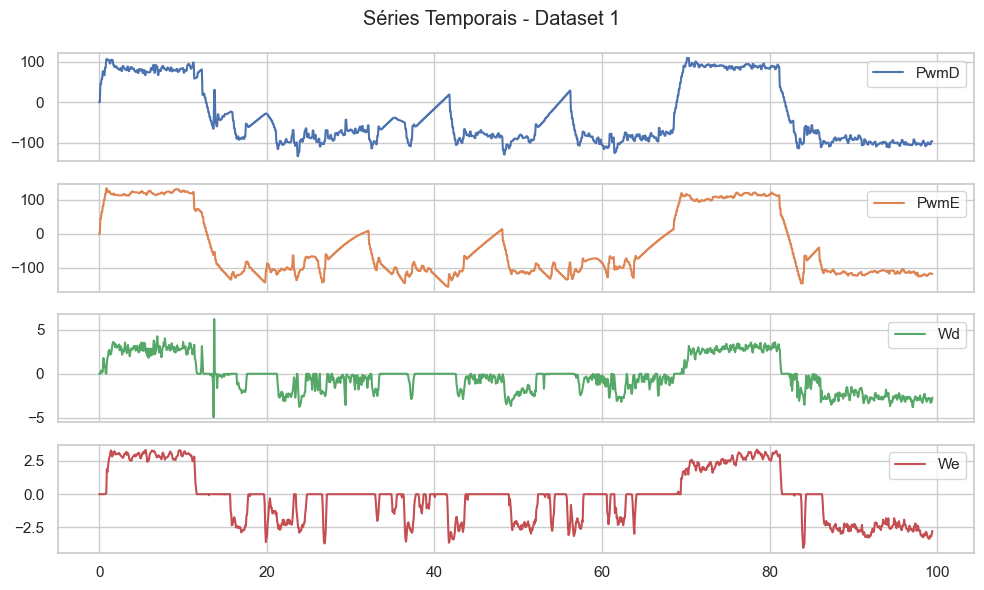

In [16]:
Datasets[0][PREDICTORS + TARGET].plot(subplots=True, figsize=(10,6), title="Séries Temporais - Dataset 1")
plt.tight_layout()
plt.show()

🕒 **Interpretação:**
- Mudanças bruscas indicam transientes.
- Trechos constantes sugerem operação estacionária.
- Padrões periódicos podem indicar um comportamento controlado ou repetitivo.

## ⚙️ 7. Análise de Componentes Principais (PCA)
Usada para identificar redundância entre as variáveis de entrada e avaliar a dimensionalidade dos dados.

Variância explicada: [0.92980667 0.07019333]


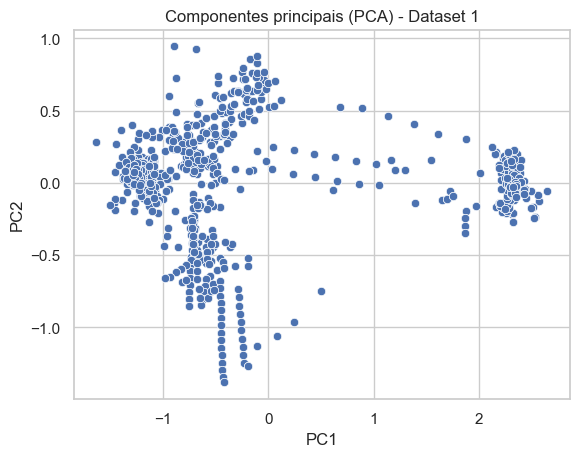

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Datasets[0][PREDICTORS])
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
print("Variância explicada:", pca.explained_variance_ratio_)

sns.scatterplot(x=components[:,0], y=components[:,1])
plt.title("Componentes principais (PCA) - Dataset 1")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

📊 **Interpretação:**
- Se uma componente explica grande parte da variância, as variáveis são fortemente correlacionadas.
- Distribuição dispersa indica que ambas as variáveis trazem informação independente.

## 📈 8. Comparação entre Datasets
Verificamos se a média das variáveis alvo muda significativamente entre os três datasets, o que pode indicar mudança de condições experimentais.

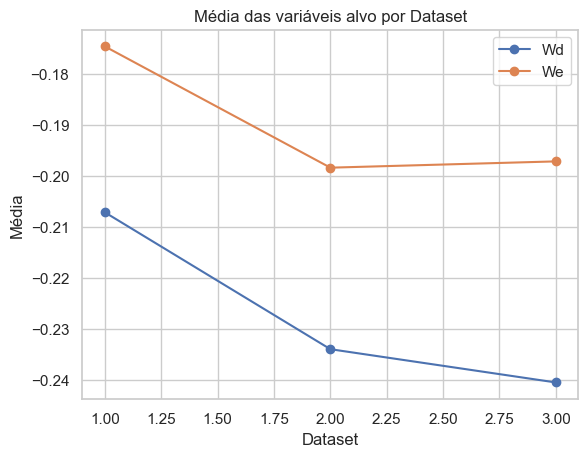

ANOVA para Wd: F=0.092, p=0.912


In [18]:
means = [data[TARGET].mean() for data in Datasets]
plt.plot(range(1,4), [m['Wd'] for m in means], 'o-', label='Wd')
plt.plot(range(1,4), [m['We'] for m in means], 'o-', label='We')
plt.legend()
plt.title("Média das variáveis alvo por Dataset")
plt.xlabel("Dataset")
plt.ylabel("Média")
plt.show()

# Teste ANOVA para diferenças significativas
f, p = f_oneway(Datasets[0]['Wd'], Datasets[1]['Wd'], Datasets[2]['Wd'])
print(f"ANOVA para Wd: F={f:.3f}, p={p:.3f}")

📊 **Interpretação:**
- Se as médias diferirem significativamente (p < 0.05), há indícios de mudança no comportamento entre datasets.
- Isso pode indicar variação experimental, ajuste de controle ou condições externas diferentes.

---
## ✅ Conclusão
Esta análise fornece uma visão detalhada sobre o comportamento e qualidade dos dados:
- **Distribuições** ajudam a identificar saturação ou ruído;
- **Boxplots** e **heatmaps** revelam outliers e relações fortes;
- **PCA** mostra redundância nas variáveis;
- **Análises comparativas** indicam estabilidade entre diferentes datasets.

Essas informações são fundamentais antes de qualquer modelagem ou ajuste de sistema.